In [ ]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../build/Release')))

import mathml_cpp

# Capítulo 3: Geometría Analítica
## 1. Comparación de Distancias (Euclidiana vs Manhattan)

In [2]:
# Definimos dos puntos en 2D
u = np.array([1.0, 1.0])
v = np.array([4.0, 5.0])

# Calculamos distancias usando C++
dist_euclidian = mathml_cpp.analytic_geometry.euclidean_distance(u, v)
dist_manhattan = mathml_cpp.analytic_geometry.manhattan_distance(u, v)

print(f"Punto u: {u}")
print(f"Punto v: {v}")
print(f"Distancia Euclidiana (L2): {dist_euclidian:.4f}")
print(f"Distancia Manhattan (L1): {dist_manhattan:.4f}")

Punto u: [1. 1.]
Punto v: [4. 5.]
Distancia Euclidiana (L2): 5.0000
Distancia Manhattan (L1): 7.0000


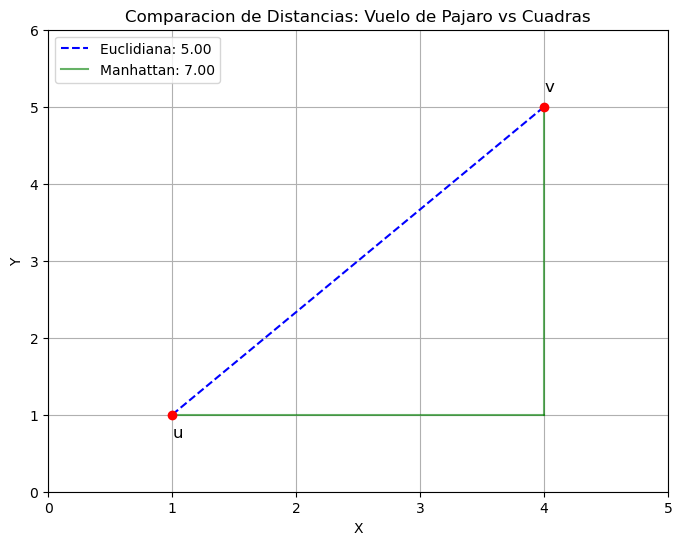

In [3]:
# Visualizacion
plt.figure(figsize=(8, 6))

# Dibujar puntos
plt.scatter([u[0], v[0]], [u[1], v[1]], color='red', zorder=5)
plt.text(u[0], u[1]-0.3, "u", fontsize=12)
plt.text(v[0], v[1]+0.2, "v", fontsize=12)

# Linea Euclidiana (Directa)
plt.plot([u[0], v[0]], [u[1], v[1]], 'b--', label=f"Euclidiana: {dist_euclidian:.2f}")

# Linea Manhattan (Escalonada)
plt.plot([u[0], v[0]], [u[1], u[1]], 'g-', alpha=0.6, label=f"Manhattan: {dist_manhattan:.2f}")
plt.plot([v[0], v[0]], [u[1], v[1]], 'g-', alpha=0.6)

plt.grid(True)
plt.legend()
plt.title("Comparacion de Distancias: Vuelo de Pajaro vs Cuadras")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 5)
plt.ylim(0, 6)
plt.show()

## 2. Motor de Similitud (Buscador Simple)
Usamos `cosine_similarity` para comparar documentos vectorizados (Bag of Words).

In [4]:
# Vectores de frecuencia simulados
# Vocabulario: ["machine", "learning", "math", "code", "pizza", "burger", "food"]

doc_a = np.array([1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]) # "machine learning math"
doc_b = np.array([1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0]) # "machine learning code"
doc_c = np.array([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0]) # "pizza burger food"

print("Doc A (ML Math):", doc_a)
print("Doc B (ML Code):", doc_b)
print("Doc C (Food):   ", doc_c)

# Calculo de Similitud Coseno
sim_ab = mathml_cpp.analytic_geometry.cosine_similarity(doc_a, doc_b)
sim_ac = mathml_cpp.analytic_geometry.cosine_similarity(doc_a, doc_c)

# Calculo de Angulos
ang_ab = mathml_cpp.analytic_geometry.vector_angle(doc_a, doc_b)
ang_ac = mathml_cpp.analytic_geometry.vector_angle(doc_a, doc_c)

print(f"\nSimilitud(A, B): {sim_ab:.4f} (Angulo: {ang_ab:.2f} grados)")
print(f"Similitud(A, C): {sim_ac:.4f} (Angulo: {ang_ac:.2f} grados)")

if sim_ab > sim_ac:
    print("\nResultado: El documento A es mas similar al B que al C.")
else:
    print("\nResultado: El documento A es mas similar al C que al B.")

Doc A (ML Math): [1. 1. 1. 0. 0. 0. 0.]
Doc B (ML Code): [1. 1. 0. 1. 0. 0. 0.]
Doc C (Food):    [0. 0. 0. 0. 1. 1. 1.]

Similitud(A, B): 0.6667 (Angulo: 48.19 grados)
Similitud(A, C): 0.0000 (Angulo: 90.00 grados)

Resultado: El documento A es mas similar al B que al C.
